In [1]:
import xarray as xr
import numpy as np
import gdal

In [2]:
ds = xr.open_dataset("D:\\EOData\\HIGHROC\\DCS4COP_S2A_0000_UNKNOWN_20170526T105031Z_31UDT_V002.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:                       (x: 10980, y: 10980)
Coordinates:
  * x                             (x) float64 4e+05 4e+05 4e+05 4e+05 4e+05 ...
  * y                             (y) float64 5.8e+06 5.8e+06 5.8e+06 ...
    lon                           (y, x) float32 ...
    lat                           (y, x) float32 ...
Data variables:
    transverse_mercator           int32 ...
    rrs_443                       (y, x) float32 ...
    rrs_490                       (y, x) float32 ...
    rrs_560                       (y, x) float32 ...
    rrs_665                       (y, x) float32 ...
    rrs_705                       (y, x) float32 ...
    rrs_740                       (y, x) float32 ...
    rrs_783                       (y, x) float32 ...
    rrs_842                       (y, x) float32 ...
    rrs_865                       (y, x) float32 ...
    rrs_1610                      (y, x) float32 ...
    rrs_2190                      (y, x) float32 ...
    TUR_NECH

In [100]:
ds.x[1] - ds.x[0]

<xarray.DataArray 'x' ()>
array(10.)

In [103]:
i = 10980 // 2
ds.lon[i][i+1] - ds.lon[i][i]

<xarray.DataArray 'lon' ()>
array(0.000145, dtype=float32)
Coordinates:
    y        float64 5.745e+06
    lat      float32 51.855007

In [20]:
ds.x

<xarray.DataArray 'x' (x: 10980)>
array([399965., 399975., 399985., ..., 509735., 509745., 509755.])
Coordinates:
  * x        (x) float64 4e+05 4e+05 4e+05 4e+05 4e+05 4e+05 4e+05 4e+05 ...
Attributes:
    units:          m
    standard_name:  projection_x_coordinate

In [18]:
ds.Kd_560

<xarray.DataArray 'Kd_560' (y: 10980, x: 10980)>
array([[     nan,      nan,      nan, ..., 0.079987, 0.079987, 0.089996],
       [     nan,      nan,      nan, ..., 0.089996, 0.089996, 0.079987],
       [     nan,      nan,      nan, ..., 0.089996, 0.089996, 0.079987],
       ...,
       [     nan,      nan,      nan, ..., 0.660004, 0.649994, 0.630005],
       [     nan,      nan,      nan, ..., 0.670013, 0.640015, 0.640015],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * x        (x) float64 4e+05 4e+05 4e+05 4e+05 4e+05 4e+05 4e+05 4e+05 ...
  * y        (y) float64 5.8e+06 5.8e+06 5.8e+06 5.8e+06 5.8e+06 5.8e+06 ...
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
Attributes:
    standard_name:  diffuse_attenuation_coefficient_of_downwelling_radiative_...
    long_name:      Diffuse attenuation coefficient at 560 nm, KD2 algorithm
    units:          m-1
    grid_mapping:   transverse_mercator

In [64]:
ds.Kd_560.encoding

{'zlib': True,
 'shuffle': True,
 'complevel': 4,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1373, 1373),
 'source': 'D:\\EOData\\HIGHROC\\DCS4COP_S2A_0000_UNKNOWN_20170526T105031Z_31UDT_V002.nc',
 'original_shape': (10980, 10980),
 '_FillValue': 32767,
 'scale_factor': 0.01,
 'add_offset': 327.68,
 'dtype': dtype('int16'),
 'coordinates': 'lat lon'}

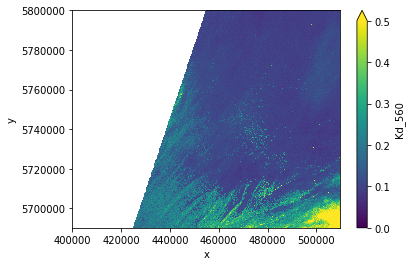

In [65]:
ds.Kd_560.plot.imshow(vmin=0., vmax=.5)

In [28]:
CRS_WKT_EPSG_4326 = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
"""

In [29]:
ds.transverse_mercator

<xarray.DataArray 'transverse_mercator' ()>
array(-2147483647)
Attributes:
    grid_mapping_name:                 transverse_mercator
    scale_factor_at_central_meridian:  0.9996
    longitude_of_central_meridian:     3.0
    latitude_of_projection_origin:     0.0
    false_easting:                     500000.0
    false_northing:                    0.0
    semi_major_axis:                   6378137.0
    inverse_flattening:                298.257223563

In [30]:
CRS_WKT_S2 = """
PROJCS["Some Sentinel-2 UTM Tile",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG",7030]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG",6326]],
        PRIMEM["Greenwich",0,AUTHORITY["EPSG",8901]],
        UNIT["DMSH",0.0174532925199433,AUTHORITY["EPSG",9108]],
        AXIS["Lat",NORTH],
        AXIS["Long",EAST],
        AUTHORITY["EPSG",4326]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0.0],
    PARAMETER["central_meridian",3.0],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000.0],
    PARAMETER["false_northing",0.0]]
"""

In [31]:
ds.x.values

array([399965., 399975., 399985., ..., 509735., 509745., 509755.])

In [32]:
ds.y.values

array([5800015., 5800005., 5799995., ..., 5690245., 5690235., 5690225.])

See http://www.gdal.org/structGDALWarpOptions.html

In [94]:
def reproject_to_wgs84(src_var):
    src_width = src_var.shape[-1]
    src_height = src_var.shape[-2]
    
    src_x1 = float(src_var.x[0])
    src_x2 = float(src_var.x[-1])
    src_y1 = float(src_var.y[0])
    src_y2 = float(src_var.y[-1])
    src_res = (src_x2 - src_x1) / (src_width - 1)
    src_geo_transform = (src_x1, src_res, 0.0,
                         src_y2, 0.0, -src_res)
    
    mem_driver = gdal.GetDriverByName("MEM")
    src_ds = mem_driver.Create('src_' + src_var.name, src_width, src_height, 1, gdal.GDT_Float32, [])    
    src_ds.SetProjection(CRS_WKT_S2)
    src_ds.SetGeoTransform(src_geo_transform)
    src_ds.GetRasterBand(1).SetNoDataValue(float('nan'))
    src_ds.GetRasterBand(1).WriteArray(src_var.values)

    dst_x1_0 = float(src_var.lon[0][0])
    dst_x2_0 = float(src_var.lon[0][-1])
    dst_y1_0 = float(src_var.lat[0][0])
    dst_y2_0 = float(src_var.lat[-1][0])
    dst_x1 = min(dst_x1_0, dst_x2_0)
    dst_x2 = max(dst_x1_0, dst_x2_0)
    dst_y1 = min(dst_y1_0, dst_y2_0)
    dst_y2 = max(dst_y1_0, dst_y2_0)
    print(dst_x1, dst_x2, dst_y1, dst_y2)
    dst_res_x = (dst_x2 - dst_x1) / (src_width - 1)
    dst_res_y = (dst_y2 - dst_y1) / (src_height - 1)    
    dst_res = min(dst_res_x, dst_res_y)
    dst_res *= 10  # !!!!
    print(dst_res_x, dst_res_y, dst_y1, dst_res)
    dst_width = int((dst_x2 - dst_x1) / dst_res + 0.5)
    dst_res = (dst_x2 - dst_x1) / dst_width
    dst_height = int((dst_y2 - dst_y1) / dst_res + 0.5)    
    print(dst_width, dst_height, dst_res)
    dst_geo_transform = (dst_x1 - dst_res / 2, dst_res, 0.0,
                         dst_y1 - dst_res / 2, 0.0, -dst_res)
    print(dst_geo_transform)
    # correct actual
    dst_x2 = dst_x1 + dst_res * (dst_width - 1)
    dst_y2 = dst_y1 + dst_res * (dst_height - 1)

    dst_ds = mem_driver.Create('dst_' + src_var.name, dst_width, dst_height, 1, gdal.GDT_Float32, [])
    dst_ds.SetProjection(CRS_WKT_EPSG_4326)
    dst_ds.SetGeoTransform(dst_geo_transform)
    dst_ds.GetRasterBand(1).SetNoDataValue(float('nan'))

    resample_alg = gdal.GRA_NearestNeighbour
    warp_mem_limit = 0
    error_threshold = 0
    options = ['INIT_DEST=NO_DATA']
    gdal.ReprojectImage(src_ds,
                        dst_ds,
                        None, # src_wkt
                        None, # dst_wkt
                        resample_alg,
                        warp_mem_limit,
                        error_threshold,
                        None,  # callback,
                        None,  # callback_data,
                        options)
    
    dst_values = dst_ds.GetRasterBand(1).ReadAsArray()
    
    dst_var = xr.DataArray(dst_values, 
                           dims=['lat', 'lon'], 
                           name=src_var.name, 
                           attrs=dict(**src_var.attrs), 
                           coords=dict(lat=np.linspace(dst_y1, dst_y2 + dst_res, dst_height),
                                       lon=np.linspace(dst_x1, dst_x2 + dst_res, dst_width)))
    
    return dst_var

In [95]:
kd_560_proj = reproject_to_wgs84(ds.Kd_560)

1.5316038131713867 3.1432173252105713 51.35447692871094 52.341304779052734
0.00014679055579189221 8.988321799269487e-05 51.35447692871094 0.0008988321799269487
1793 1098 0.0008988363145784632
(1.5311543950140976, 0.0008988363145784632, 0.0, 51.35402751055365, 0.0, -0.0008988363145784632)


In [96]:
kd_560_proj

<xarray.DataArray 'Kd_560' (lat: 1098, lon: 1793)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 51.35 51.36 51.36 51.36 51.36 51.36 51.36 51.36 ...
  * lon      (lon) float64 1.532 1.533 1.533 1.534 1.535 1.536 1.537 1.538 ...
Attributes:
    standard_name:  diffuse_attenuation_coefficient_of_downwelling_radiative_...
    long_name:      Diffuse attenuation coefficient at 560 nm, KD2 algorithm
    units:          m-1
    grid_mapping:   transverse_mercator

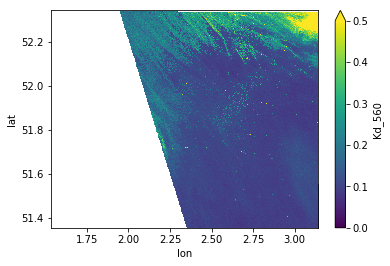

In [97]:
kd_560_proj.plot.imshow(vmin=0., vmax=.5)

In [71]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72